## Regresión Lineal (01)

La regresión lineal es uno de los primeros ejemplos y ejercicios a realizar al momento de introducirse en el uso del aprendizaje automático y la ciencia de datos. Es una de las formas más simples y sencillas para hacer un modelo formal sobre un conjunto de datos para su anállisis y pronóstico.

Declaración de bibliotecas a usar y su propósito.

In [1]:
# Para manejo del protocolo HTTP y la descarga del archivo de datos. En caso de que el archivo ya no pudiera estar disponible en el 
# futuro, una copia de éste se ha hecho en el directorio Archive.
from io import StringIO
import requests

# Biblioteca de modelos de machine learning y medidas.
#from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics

# Procesamiento de datos en data frames y procesamiento numérico.
import pandas as pd
import numpy as np

# Bibliotecas de visualización.
import matplotlib.pyplot as plt
# import seaborn as sns

Para facilitar la visualización de gráficos de **Matplotlib** y su actualización en línea

In [2]:
%matplotlib inline

In [3]:
# URL del archivo a ser descargado
url = 'https://raw.githubusercontent.com/kumudlakara/Medium-codes/main/linear_regression/house_price_data.txt'

# Se crea un objeto que permita interactuar con el protocolo HTTP.
response = requests.get(url)

Se valida si el archivo puede ser descargado. Para este caso, la forma como el servidor web responde sobre el archivo de la petición genera una respuesta de direccionamiento (en un browser se abrirá una ventana de dialógo para seleccionar un directoprio donde guardar al archivo), de aquí que se recurra al uso de la biblioteca `io` para obtner el conteniod del archivo de un _stream_ de octetos que puedan ser leídos como los datos de un archivo. Como el archivo no cuenta con nombres de columnas, éstas deben ser adicionadas.

In [4]:
if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
else:
    print(f"Failed to fetch data: status code {response.status_code}")

Se revisa la estructura del _data frame_ en general (contenido, tipos de datos, registros faltantes).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   housesize  46 non-null     int64
 1   rooms      46 non-null     int64
 2   price      46 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [6]:
df.head()

,housesize,rooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


Una inspección visual, genérica también, se puede hacer mediante una gráfica.

Tomamos las dos primeras columnas del _dataset_ (`data[:, :2]`) para las variables independientes y la última (`datos[:,-1]`) como la varible dependiente.

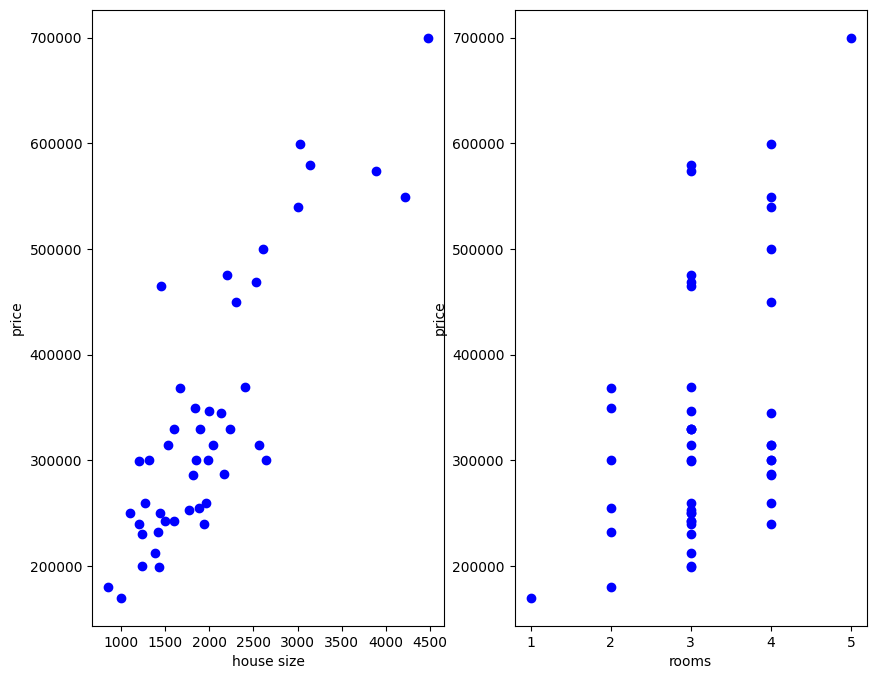

In [7]:
data = np.array(df, dtype=float)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
axes[0].plot(data[:,0], data[:,-1], 'bo')
axes[0].set_xlabel('house size')
axes[0].set_ylabel('price')

axes[1].plot(data[:,1], data[:,-1], 'bo')
axes[1].set_xlabel('rooms')
axes[1].set_ylabel('price')
plt.show()

Si observa el conjunto de datos sin procesar, se notará que los valores de la segunda columna (el número de habitaciones) son mucho más pequeños que los de la primera (el tamaño de la casa). Nuestro modelo no evalúa estos datos como el número de habitaciones o el tamaño de la casa. Para el modelo, todo son solo números. Esto puede crear un sesgo no deseado en su modelo de aprendizaje automático hacia las columnas (o características) con valores numéricos más altos que las demás. También puede crear un desequilibrio en la varianza y la media matemática. Por estos motivos y también para facilitar el trabajo, siempre se recomienda escalar o normalizar las funciones para que todas se encuentren dentro del mismo rango (por ejemplo, [-1 a 1] o [0 a 1]). Esto hace que el entrenamiento sea mucho más sencillo. Entonces, para nuestro propósito aquí, usaremos la normalización de características, que en el sentido matemático significa:

$$ Z = \frac{x-\mu}{\sigma} $$
donde:
+ $\micro$ es la media, y
+ $\sigma$ es la desviación estandard.

In [11]:
mu = []
std = []
for i in range(0,data.shape[1]-1):
	mu.append(np.mean(data[:,i]))
	std.append(np.std(data[:, i]))
	data[:,i] = ((data[:,i] - mu[-1]))/std[-1]


In [12]:
data

array([[-5.01457678e-01, -2.28664780e-01,  3.29900000e+05],
       [ 5.05397546e-01, -2.28664780e-01,  3.69000000e+05],
       [-7.33034380e-01, -1.54348727e+00,  2.32000000e+05],
       [ 1.26053896e+00,  1.08615771e+00,  5.39900000e+05],
       [-1.69086013e-02,  1.08615771e+00,  2.99900000e+05],
       [-5.84523234e-01, -2.28664780e-01,  3.14900000e+05],
       [-7.19190120e-01, -2.28664780e-01,  1.98999000e+05],
       [-7.78342865e-01, -2.28664780e-01,  2.12000000e+05],
       [-6.34865995e-01, -2.28664780e-01,  2.42500000e+05],
       [-7.35442077e-02,  1.08615771e+00,  2.39999000e+05],
       [ 1.96993413e-03, -2.28664780e-01,  3.47000000e+05],
       [-1.36472659e-01, -2.28664780e-01,  3.29999000e+05],
       [ 3.12070399e+00,  2.40098019e+00,  6.99900000e+05],
       [-9.19302596e-01, -2.28664780e-01,  2.59900000e+05],
       [ 3.79540643e-01,  1.08615771e+00,  4.49900000e+05],
       [-8.53857006e-01, -1.54348727e+00,  2.99900000e+05],
       [-9.59576805e-01, -2.28664780e-01

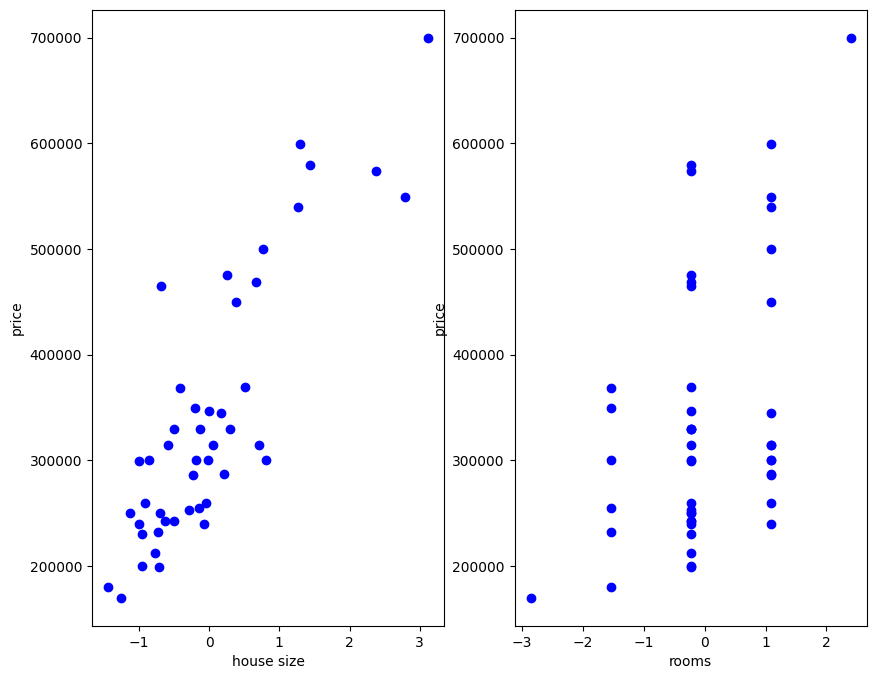

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
axes[0].plot(data[:,0], data[:,-1], 'bo')
axes[0].set_xlabel('house size')
axes[0].set_ylabel('price')

axes[1].plot(data[:,1], data[:,-1], 'bo')
axes[1].set_xlabel('rooms')
axes[1].set_ylabel('price')
plt.show()

Primero, necesitamos definir nuestra función de hipótesis. Usaremos esta función para calcular el costo más adelante. Sabemos que para la regresión lineal, nuestra función de hipótesis se puede generalizar de la siguiente manera:

$$ h\theta(x) = θ_{0} + θ_{1}x_{1} + θ_{2}x_{2} + θ_{3}x_{3} + \ldots + θ_{n}x_{n} $$

Nuestro conjunto de datos, sin embargo, tiene sólo dos características, por lo que para nuestro problema actual, la hipótesis es:

$$ h\theta(x) = θ_{0} + θ_{1}x_{1} + θ_{2}x_{2} $$ 

Donde $ x_{1} $ y $ x_{2} $ son las dos características (es decir, tamaño de la casa y número de habitaciones).

In [14]:
def h(x,theta):
	return np.matmul(x, theta)

$$ J(\theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2 $$

In [15]:
def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

$$ {\theta_j}_{t+1} = {\theta_j}_t - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1), j=\{0,1\}$$

Entonces, multiplicamos la derivada de la función de costo por la tasa de aprendizaje (α) y la restamos del valor actual ($t$) de los parámetros $θ$ para obtener los nuevos parámetros actualizados ($t+1$). La función `gradient_descent` devuelve `theta` y `J_all`. `theta` es nuestro vector de parámetros, que contiene los valores $θ$ para la hipótesis, y `J_all` es una lista que contiene la función de costo después de cada época. La variable `J_all` no es precisamente esencial, pero ayuda a analizar mejor el modelo.

In [16]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

In [17]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

In [18]:
def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]

	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)

A lo largo del código hemos estado utilizando la multiplicación de matrices para lograr las expresiones deseadas. Por ejemplo, para obtener la hipótesis, tuvimos que multiplicar cada parámetro $θ$ con cada vector de características (`x`). Podríamos usar ciclos para esto y recorrer cada ejemplo y realizar la multiplicación cada vez; sin embargo, esto no sería lo más método eficiente si tuviéramos, digamos, 10 millones de ejemplos de entrenamiento. Un enfoque más eficiente aquí sería utilizar la multiplicación de matrices. 

Para nuestro conjunto de datos, tenemos dos características (es decir, el tamaño de la casa y la cantidad de habitaciones), por lo que tendremos (2+1) 3 parámetros. El parámetro adicional $θ_0$ puede explicarse considerando que la hipótesis no es más que una línea en el sentido gráfico.

Bien, entonces tenemos tres parámetros y dos características. Esto significa que nuestro $θ$ o vector de parámetros (matriz 1-D) tendrá las dimensiones (3,1), pero nuestro vector de características tendrá las dimensiones (46,2) (según nuestro conjunto de datos). Multiplicar estas dos matrices no es matemáticamente posible. Observando nuestra hipótesis:

$$ h\theta(x) = θ_{0} + θ_{1}x_{1} + θ_{2}x_{2} $$ 

Si miras de cerca, es bastante intuitivo que si agregamos una columna adicional de unos al comienzo de nuestro vector de características (`x`) (haciéndolo tener las dimensiones (46, 3)) y si realizamos una multiplicación de matrices en `x` y $θ$ de hecho llegaremos a la ecuación anterior para $hθ(x)$. Si aún no es evidente, intente elaborar un ejemplo en papel.

Después de esto, inicializamos nuestro vector theta con ceros. También puedes inicializarlo con algunos pequeños valores aleatorios. También especificamos la tasa de aprendizaje y la cantidad de épocas (una época es la cantidad de veces que el algoritmo recorrerá todo el conjunto de datos) para las que queremos entrenar.

In [24]:
x = data[:,:2]
y = data[:, -1]

x = np.hstack((np.ones((x.shape[0],1)), x))
y = np.reshape(y, (46,1))

theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50

Una vez que tenemos todos nuestros hiperparámetros definidos, llamamos a la función de descenso de gradiente, que devuelve un historial de todas las funciones de costos y el vector final de parámetros $θ$. Este vector theta es esencialmente lo que define nuestra hipótesis final. Puede observar que la forma del vector theta devuelto por la función de descenso de gradiente tiene las dimensiones (3,1).

In [24]:
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)

Si recordamos nuestra hipótesis:

$$ h\theta(x) = θ_{0} + θ_{1}x_{1} + θ_{2}x_{2} $$ 

necesitábamos tres $θ$ y nuestro vector $θ$ tiene las dimensiones (3,1); por lo tanto, cada uno de `theta[0]`, `theta[1]` y `theta[2]` es, de hecho, $θ_0$, $θ_1$ y $θ_2$ respectivamente. La variable `J_all` no es más que el historial de todas las funciones de costos. Puede imprimir la matriz `J_all` para ver cómo la función de costo disminuye progresivamente para cada época de descenso del gradiente.

In [27]:
J = cost_function(x, y, theta)
print("Cost: ", J[0,0])
print("Parameters:\n ", theta)

Cost:  2084753114.7399435
Parameters:
  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


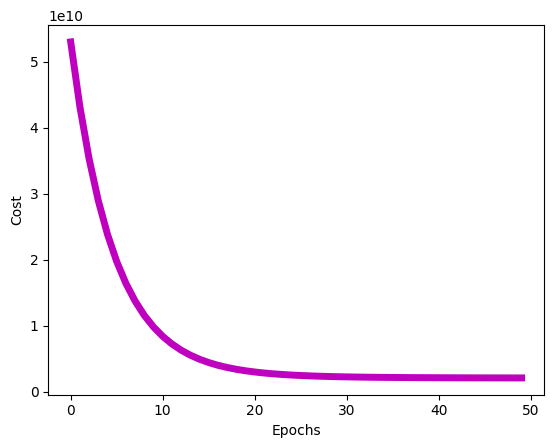

In [28]:
#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

In [29]:
test(theta, [1600, 3])

Price of house:  [285201.81900083]


# Referencias

1. Kumud Lakara, "_Basics and Beyond: Linear Regression_", **towardsdatascience.com**,_web_. Published:  2020.12.26; visited: 2024.02.24. URL: [https://medium.com/analytics-vidhya/basics-and-beyond-linear-regression-c12d99a4df35](https://medium.com/analytics-vidhya/basics-and-beyond-linear-regression-c12d99a4df35)
2. Kumud Lakara, "_Coding Linear Regression from Scratch_", **towardsdatascience.com**,_web_. Published:  2021.01.05; visited: 2024.02.22. URL: [https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902](https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902)